In [87]:
# Date: 21/December/2022 - Wednesday
# Author: Virgilio Murillo Ochoa
# personal github: Virgilio-AI
# linkedin: https://www.linkedin.com/in/virgilio-murillo-ochoa-b29b59203
# contact: data_scientist@virgiliomurillo.com
# web: virgiliomurillo.com

In [88]:
# import libraries

In [89]:
import pandas as pd
import time
import datetime
from numpy.random import randint
import numpy as np # for importing numpy
import matplotlib.pyplot as plt # for importing matplotlib
from pyspark.sql import SparkSession
from pyspark.sql.functions import lower, col, udf,regexp_extract

In [90]:
%%javascript
(function(on) {
    const e = $("<a>Setup failed</a>");
    const ns = "js_jupyter_suppress_warnings";
    var cssrules = $("#" + ns);
    if(!cssrules.length)
        cssrules = $("<style id='" + ns + "' type='text/css'>div.output_stderr { } </style>").appendTo("head");
    e.click(function() {
        var s = 'Showing';
        cssrules.empty()
        if(on) {
            s = 'Hiding';
            cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
        }
        e.text(s + ' warnings (click to toggle)');
        on = !on;
    }).click();
    $(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [91]:
spark = SparkSession.builder.appName("Python Spark SQL basic example").config("spark.some.config.option", "some-value").getOrCreate()

In [92]:
prev = datetime.datetime.now()
description = spark.read.format("csv").option("inferSchema","true").option("header","true").load("Course_info.csv")
now = datetime.datetime.now()
print(now - prev)

0:00:00.841078


In [93]:
prev = datetime.datetime.now()
comments = spark.read.format("csv").option("inferSchema","true").option("header","true").load("Comments.csv")
now = datetime.datetime.now()
print(now - prev)

0:00:02.642789


In [94]:
df = description.limit(10).toPandas()
df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup...",26474.0,4.5,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,None,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.4,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.8,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,None,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [95]:
prev = datetime.datetime.now()
description = description.withColumn("num_subscribers",description['num_subscribers'].cast('int'))
description = description.withColumn("num_reviews",description['num_reviews'].cast('int'))
description = description.withColumn("num_comments",description['num_comments'].cast('int'))
description = description.withColumn("num_lectures",description['num_lectures'].cast('int'))
description = spark.read.format("csv").option("inferSchema","true").option("header","true").load("Course_info.csv")
description = description.withColumn("published_time",description['published_time'].cast('timestamp'))
description = description.withColumn("last_update_date",description['last_update_date'].cast('date'))
now = datetime.datetime.now()
print(now - prev)

0:00:00.449871


In [96]:
def get_name(url):
	if url == None:
		return ""
	return str(url[6:-1])

def get_course_name(url):
	if url == None:
		return ""
	return str(url[8:-1])

In [97]:
description.printSchema()

root
 |-- id: double (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_reviews: string (nullable = true)
 |-- num_comments: string (nullable = true)
 |-- num_lectures: string (nullable = true)
 |-- content_length_min: double (nullable = true)
 |-- published_time: timestamp (nullable = true)
 |-- last_update_date: date (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [98]:
prev = datetime.datetime.now()
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType
get_name_udf = udf(lambda x:get_name(x),StringType())
get_cname_udf = udf(lambda x:get_course_name(x),StringType())
# Custom UDF with withColumn()
description = description.withColumn("instructor_url", get_name_udf(col("instructor_url")))
description = description.withColumn("course_url", get_cname_udf(col("course_url")))
# rename columns
description = description.withColumnRenamed("instructor_url","instructor_username")
description = description.withColumnRenamed("course_url","course_name")
now = datetime.datetime.now()
print(now - prev)

0:00:00.033160


In [99]:
def getFirstName(name):
	ans = ""
	if name is None:
		return "None"
	sname = name.split()
	prefix = ['mr.','mrs.','ms.','dr.','prof.','sr.','jr.','.',',','mr','mrs','ms','dr','prof','sr','jr']
	for i in range(len(sname)):
		sname[i] = sname[i].lower()
	if len(sname) > 0 and sname[0] not in prefix:
		ans = sname[0]
	elif len(sname) > 1 and sname[1] not in prefix:
		ans = sname[1]
	elif len(sname) > 2 and sname[2] not in prefix:
		ans = sname[2]
	ans =ans.capitalize()
	return ans

In [100]:
# user define function ========= 
prev = datetime.datetime.now()
getFirstNameUdf = udf(lambda x:getFirstName(x),StringType())
description = description.withColumn("instructor_name", getFirstNameUdf(col("instructor_name")))
description = description.withColumnRenamed("instructor_name","name")
now = datetime.datetime.now()
print(now - prev)

0:00:00.015945


In [101]:
description.limit(5).toPandas().head()

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/pyspark/venv/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_name,name,instructor_username
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05 17:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,vegan-vegetarian-cooking-school,Angela,angelapoch
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup...",26474.0,4.5,709.0,112.0,9.0,88.0,2010-01-12 12:09:46,None,Business,Entrepreneurship,Lean Startup,English,the-lean-startup-debunking-myths-of-entreprene...,Eric,ericries
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.4,41.0,13.0,14.0,82.0,2010-10-13 13:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,see-my-personal-motivation-for-becoming-vegeta...,Angela,angelapoch
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.8,395.0,88.0,36.0,1511.0,2011-06-20 15:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,complete-dunbar-collection,Ian,ian-dunbar
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23 13:31:20,None,Design,Web Design,Web Design,English,web-design-from-the-ground-up,E,edwin-ang-2


In [102]:
import gender_guesser.detector as gender
gd = gender.Detector()

In [103]:
get_gender_udf = udf(lambda x:gd.get_gender(x),StringType())
description = description.withColumn("gender", get_gender_udf(col("name")))

In [104]:
description.limit(5).toPandas().head()

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/pyspark/venv/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_name,name,instructor_username,gender
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,...,2010-08-05 17:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,vegan-vegetarian-cooking-school,Angela,angelapoch,female
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup...",26474.0,4.5,709.0,112.0,9.0,...,2010-01-12 12:09:46,None,Business,Entrepreneurship,Lean Startup,English,the-lean-startup-debunking-myths-of-entreprene...,Eric,ericries,male
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.4,41.0,13.0,14.0,...,2010-10-13 13:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,see-my-personal-motivation-for-becoming-vegeta...,Angela,angelapoch,female
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.8,395.0,88.0,36.0,...,2011-06-20 15:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,complete-dunbar-collection,Ian,ian-dunbar,male
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,...,2011-06-23 13:31:20,None,Design,Web Design,Web Design,English,web-design-from-the-ground-up,E,edwin-ang-2,unknown


In [105]:
# a basic filtering of the information
prev = datetime.datetime.now()
known_instructors = description.filter("gender != 'unknown' ")
now = datetime.datetime.now()
print(now - prev)

0:00:00.003371


In [106]:
known_instructors.limit(5).toPandas().head(5)

/home/rockhight/Documents/gitRepos/bigDataUdemyDataframe/pyspark/venv/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_name,name,instructor_username,gender
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,...,2010-08-05 17:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,vegan-vegetarian-cooking-school,Angela,angelapoch,female
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.0,"""Debunking Myths of Entrepreneurship A startup...",26474.0,4.5,709.0,112.0,9.0,...,2010-01-12 12:09:46,None,Business,Entrepreneurship,Lean Startup,English,the-lean-startup-debunking-myths-of-entreprene...,Eric,ericries,male
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.4,41.0,13.0,14.0,...,2010-10-13 13:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,see-my-personal-motivation-for-becoming-vegeta...,Angela,angelapoch,female
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.8,395.0,88.0,36.0,...,2011-06-20 15:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,complete-dunbar-collection,Ian,ian-dunbar,male
4,8139.0,14-Day Yoga Detox and Empowerment Course,True,29.99,"Lose weight, get healthier and fit on all leve...",20505.0,4.5301204,796.0,135.0,31.0,...,2011-07-14 23:13:24,2018-05-22,Health & Fitness,Yoga,Yoga,English,yoga-for-weight-loss-and-core-strength-with-sa...,Sadie,sadienardini,female


In [107]:
from pyspark.sql.functions import sum, max, min, avg, count, mean

In [108]:
# average groupby ==========
prev = datetime.datetime.now()
avg_num_subscribers_per_gender = known_instructors.groupBy('gender').agg(mean("num_subscribers"))
now = datetime.datetime.now()
print(now - prev)

0:00:00.009165


In [109]:
# This is a HUGE inconvenient for plotting
avg_num_subscribers_per_gender.toPandas().head()

,gender,avg(num_subscribers)
0,mostly_female,2999.465569
1,female,1526.722627
2,andy,2980.041216
3,male,3594.535692
4,mostly_male,3624.219729


In [110]:
pltp = avg_num_subscribers_per_gender.toPandas()

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='gender', ylabel='avg(num_subscribers)'>

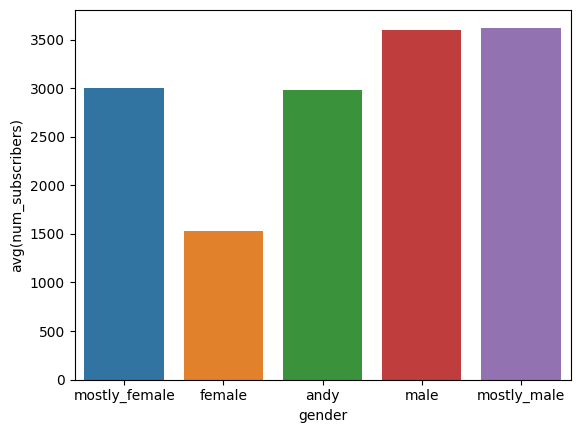

In [112]:
sns.barplot(data = pltp, x ="gender", y = "avg(num_subscribers)")

In [113]:
avg_avg_rating = known_instructors.groupBy('gender').agg(mean("avg_rating"))

<AxesSubplot: xlabel='gender', ylabel='avg(avg_rating)'>

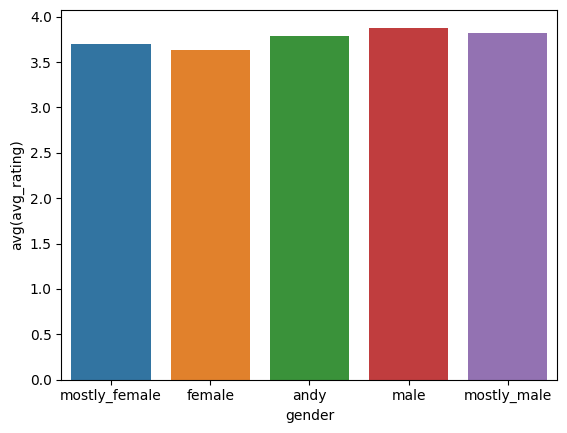

In [114]:
sns.barplot(data = avg_avg_rating.toPandas(), x ="gender", y = "avg(avg_rating)")



In [115]:

# Experimental:
# extract the name using regex

## Custom UDF with select()  
#df.select(col("Seqno"),get_name_udf(col("Name")).alias("Name") ).show(truncate=False)
#
## %%
#tmp_data = description.select(regexp_extract('instructor_url', '^/[A-Za-z]+/(\S*)/|(\s)$',1))
#
## %%
#description.printSchema()
#
## %%
#df = description.limit(20).toPandas()
#df.head()
#
## %%
#description.count()
#
## %%
#df = tmp_data.limit(20).toPandas()
#df.head()
#
## %%
#tmp_data.show(100)